San Vu Ngoc - [IRMAR](https://irmar.univ-rennes1.fr/)
___

### Initialisations

In [1]:
%matplotlib inline
# inline can be replaced by notebook to get interactive plots
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib.cm as cm
import matplotlib.colors as colors

In [3]:
plt.rcParams['figure.figsize'] = (10.0, 6.0) # set figures display bigger

## Algorithme d'Euclide pour le pgcd

On fait ici le cas $a\geq 0$ et $b\geq 0$. À adapter pour le cas général !  

L'algorithme est *récursif*. Il suffit de programmer deux étapes, qui correspondent à l'_initialisation_ et l'_hérédité_ dans le *principe de récurrence*.  

1. __l'initialisation:__
   En fait, en programmation récursive on appelle plutôt ça la _terminaison_: c'est ce qui permet d'assurer que le programme ne va pas tourner indéfiniment:
   "Si b=0, alors le pgcd(a,b) est a"  
   
2. __l'hérédité:__
    Pour calculer `pgcd(a,b)`, avec $a\geq b$, on se ramène à des entiers "plus petits" grâce à la formule
    `pgcd(a,b) = pgcd(b,r)`
    où r est le reste de la division euclidienne de a par b.

    Si jamais $a<b$ ce n'est pas grave car la méthode ci-dessus va appeler la fonction `pgcd(b,a)` !
    (et ensuite, le problème ne se posera plus cas $r<b$).
    
__Important:__ Pour utiliser une méthode récursive, il faut démontrer que la notion de "plus petits" utilisée dans l'hérédité finit bien par aboutir à l'étape de terminaison en un nombre fini d'itérations...  
Ici on sait que $r<b\leq a$. Donc $\min(b,r)\leq \min(a,b) - 1$. Donc _au pire_ au bout de $N$ étapes avec $N=\min(a,b)$, on sait que le "reste" $r$ sera nul.

In [4]:
def pgcd (a,b):
    if b == 0:
        return a  
    else:
        return pgcd(b, a % b)

In [5]:
pgcd(7,123)

1

In [6]:
pgcd(12,18)

6

In [7]:
pgcd(12,0), pgcd(0,0)

(12, 0)

In [8]:
pgcd(1234,2018)

2

## Version non récursive

Les algorithmes récursifs sont très pratiques lorsqu'on peut raisonner par récurrence. Mais, en python, ils ne sont pas optimisés, il demandent davantage de mémoire (mémoire de _pile_ ou _stack_) et ne sont donc pas adaptés pour un grand nombre d'itérations (en gros supérieur à 1000).

_(Pour le pgcd ce n'est pas très grave car l'algorithme d'Euclide est très efficace: peu d'itérations même pour des entiers très grands, cf. ci-dessous. Il faudrait des nombres avec plus de 200 chiffres pour que ça plante...)_

In [9]:
pgcd(98966670810630423534302151820587335031466666343849443734017657748199169524665705367570906859090512509718775557015222431021714647829386322577296271424256021684582295977152259098829205426386824411990866793L, 160131437125022133570186981636530600256034719271619021063640417693436516163698377535248015679488033602845112321108929620534730439060000506398830226180857811739131287777823445209422467744194016647915972857L)

RuntimeError: maximum recursion depth exceeded in cmp

In [10]:
pgcd(61164766314391710035884829815943265224568052927769577329622759945237346639032672167677108820397521093126336764093707189513015791230614183821533954756601790054548991800671186110593262317807192235925106064L, 98966670810630423534302151820587335031466666343849443734017657748199169524665705367570906859090512509718775557015222431021714647829386322577296271424256021684582295977152259098829205426386824411990866793L)

1L

In [11]:
def pgcdI (a,b):  # version "itérative"
    while b <> 0:
        (a, b) = (b, a % b)
    return a

In [12]:
pgcdI(1234,2018), pgcdI(12,18), pgcdI(7,123)

(2, 6, 1)

In [13]:
pgcdI(61164766314391710035884829815943265224568052927769577329622759945237346639032672167677108820397521093126336764093707189513015791230614183821533954756601790054548991800671186110593262317807192235925106064L, 98966670810630423534302151820587335031466666343849443734017657748199169524665705367570906859090512509718775557015222431021714647829386322577296271424256021684582295977152259098829205426386824411990866793L)

1L

## Images

### 1. pgcd

Rappel: on a tracé la semaine dernière la relation "i divise j". Maintenant on regarde le "graphe" de "pgcd(i,j)".

In [14]:
def GCD (n):
    T = np.zeros((n,n))
    for i in range(1, n-1):
        for j in range(1, n-1):
            T[i,j] = pgcdI(j,i)
    return T

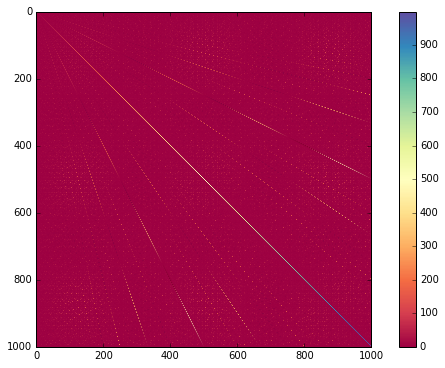

In [15]:
plt.imshow(GCD(1000), interpolation='lanczos', cmap=cm.Spectral)
plt.colorbar()
#img.imsave('pgcd-log1000.png', GCD(1000), cmap=cm.Spectral)

### 2. Reste de la division de i par j

In [16]:
n=100
R = np.zeros((n,n))
for i in range(1, n-1):
        for j in range(1, n-1):
            R[i,j] = j % i + 1  # on ajoute 1 pour pouvoir faire 
                                # une échelle de couleurs logarithmique

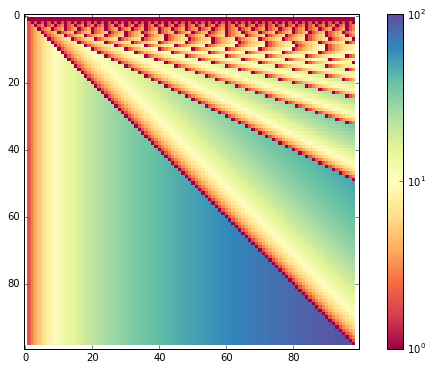

In [17]:
plt.imshow(R, interpolation='none', cmap=cm.Spectral, norm=colors.LogNorm(1,n))
plt.colorbar()

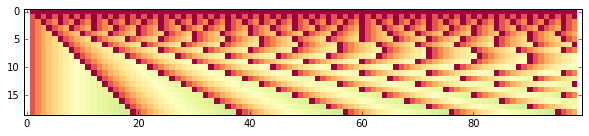

In [18]:
Top = R[1:20,::]
plt.imshow(Top, interpolation='nearest', cmap=cm.Spectral, norm=colors.LogNorm(1,n))

### 3. Nombre d'itérations de l'algorithme d'Euclide

In [19]:
def pgcdIter (a,b):
    r = a % b
    if r == 0:
        return 1
    else:
        return 1 + pgcdIter(b,r)
    
def pgcdIterI (a,b):  # version "itérative"
    n = 0
    while b <> 0:
        (a, b) = (b, a % b)
        n = n + 1
    return n

In [20]:
pgcdIter(100,1), pgcdIterI(100,1)

(1, 1)

In [21]:
pgcdIter(1234,2018), pgcdIterI(1234,2018)

(10, 10)

In [22]:
def ITER (n):
    T = np.zeros((n,n))
    for i in range(1, n-1):
        for j in range(1, n-1):
            T[i,j] = pgcdIter(j,i)
    return T

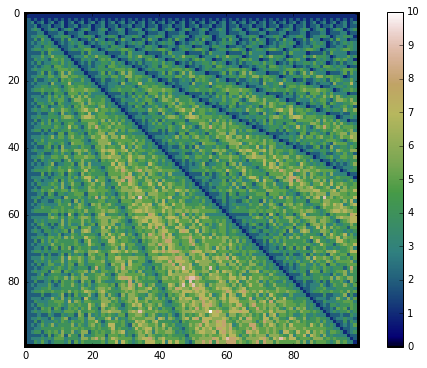

In [23]:
plt.imshow(ITER(100), interpolation='nearest', cmap=cm.gist_earth)
plt.colorbar()

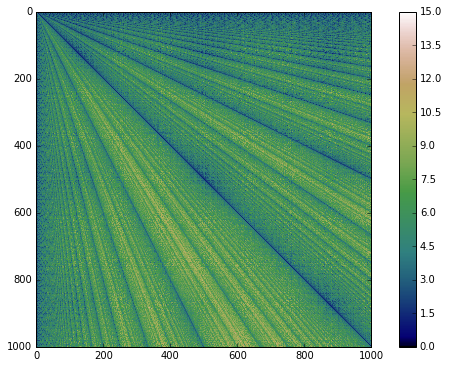

In [24]:
ar=ITER(1000)
plt.imshow(ar, cmap=cm.gist_earth)
plt.colorbar()
#img.imsave('image1000.png', ar, cmap=cm.gist_earth)

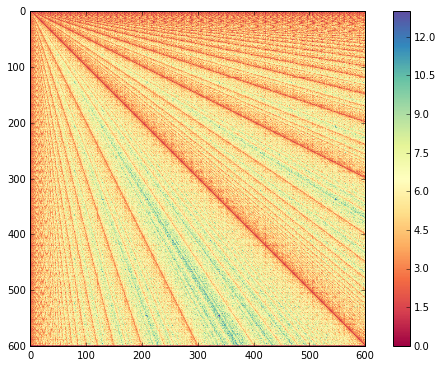

In [25]:
plt.imshow(ITER(600), cmap=cm.Spectral)
plt.colorbar()

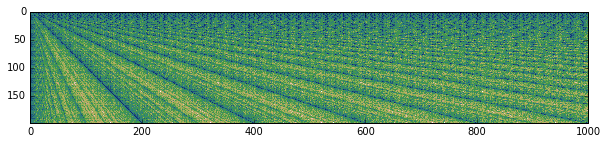

In [26]:
Top = ar[1:200,::]
plt.imshow(Top, interpolation='nearest', cmap=cm.gist_earth)

In [27]:
pgcdIter(546,337)

12

In [28]:
pgcdIter(377,610)

14

In [29]:
pgcdIter(55,89)

10

On peut regarder l'image avec le gimp pour voir les pixels... cf (377,610)

In [30]:
def fibPaire (n):
    if n == 0:
        return (0,1)
    else:
        a,b = fibPaire (n-1)
        return (b,a+b)
    
def fib (n):
    a,b = fibPaire (n)
    return a

In [31]:
[fib(n) for n in range(0,17)]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987]

La complexité la "pire" est obtenue par des paires de __nombres de Fibonacci__ consécutifs. Leur pgcd est toujours 1 (ils sont premiers entre eux). À démontrer par récurrence...

In [32]:
pgcdIter(9227465, 14930352)

35

Pour tester des grands nombres, il faut une version non récursive de l'algorithme.

In [33]:
def fibI (n):
    a,b = 0,1
    while n > 0:
        (a,b) = (b,a+b)
        n = n-1
    return a

In [34]:
[fibI(n) for n in range(0,15)]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]

In [35]:
fibI(974), fibI(974+1)

(160131437125022133570186981636530600256034719271619021063640417693436516163698377535248015679488033602845112321108929620534730439060000506398830226180857811739131287777823445209422467744194016647915972857L,
 259098107935652557104489133457117935287501385615468464797658075441635685688364082902818922538578546112563887878124152051556445086889386828976126497605113833423713583754975704308251673170580841059906839650L)

In [36]:
float(fibI(974))

1.6013143712502212e+203

In [37]:
pgcdI(fibI(974), fibI(974+1))

1L

In [38]:
pgcdIterI(fibI(974), fibI(974+1))

974

In [39]:
fibI(972), fibI(972+1)

(61164766314391710035884829815943265224568052927769577329622759945237346639032672167677108820397521093126336764093707189513015791230614183821533954756601790054548991800671186110593262317807192235925106064L,
 98966670810630423534302151820587335031466666343849443734017657748199169524665705367570906859090512509718775557015222431021714647829386322577296271424256021684582295977152259098829205426386824411990866793L)

### Mauvais (i,j)
On trace les (i,j) qui sont les $(F_k,F_{k+1})$ **et leurs multiples**.
La couleur indique la complexité de l'algorithme d'Euclide pour  `pgcd(i,j)`. On commence à $k=k0$.

In [40]:
def BAD (n,k0):
    T = np.zeros((n,n))
    F1, F2 = fibPaire(k0)   # on part les k0-ème et 
    m = 1                   # (k0+1)-ème nombres de Fibonacci.    
    while F2 < n:
        i, j = F1, F2
        while j < n:
            T[i,j] = m
            T[j,i] = m
            i, j = i+F1, j+F2
        m = m+1
        F1, F2 = F2, F1+F2   # on passe au couple de Fibonacci suivant
    return T

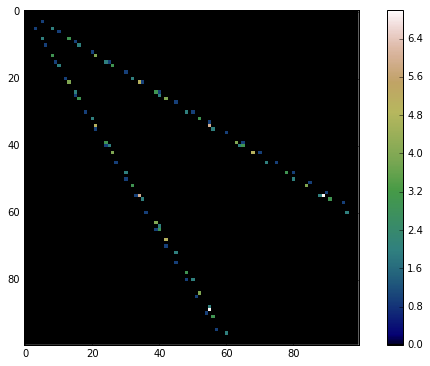

In [41]:
ar=BAD(100,4)
plt.imshow(ar, interpolation='none', cmap=cm.gist_earth)
plt.colorbar()